# Bias correction of numerical prediction model temperature forecast Data Set



https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.




Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bias_correction_ucl.csv',parse_dates=['Date'])
df.head(20)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [5]:
df.shape

(7752, 25)

In [6]:
print(df.isna().values.any())
df.isnull().sum()

True


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(7588, 25)

In [9]:
df['month']=df['Date'].apply(lambda x:x.month)
df['year']=df['Date'].dt.year
df['day']=df['Date'].apply(lambda x:x.day)
df=df.drop('Date',axis=1)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


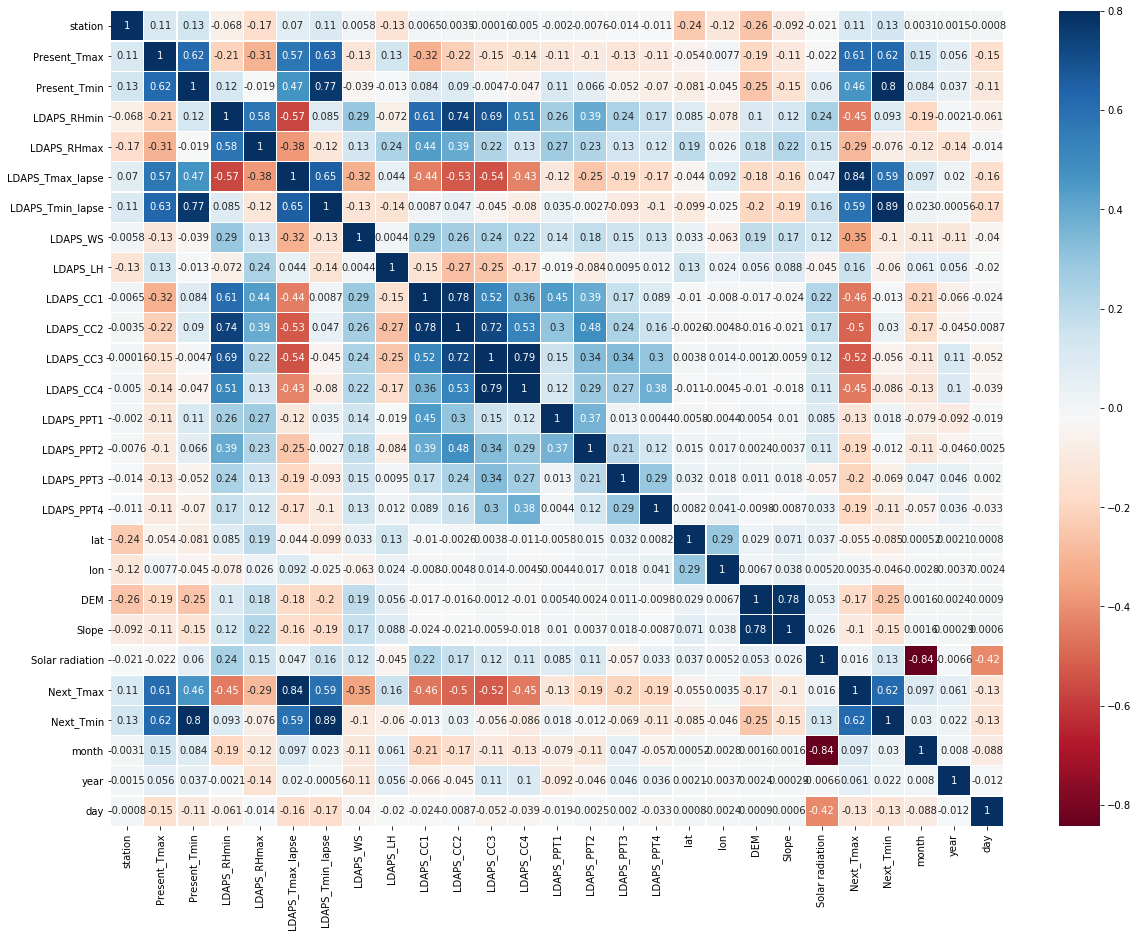

In [11]:
# Correlation Plot
corrmat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 15))

#Draw the heatmap using seaborn
colormap = plt.cm.RdBu
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [12]:
#lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(7588, 27)
(6739, 27)


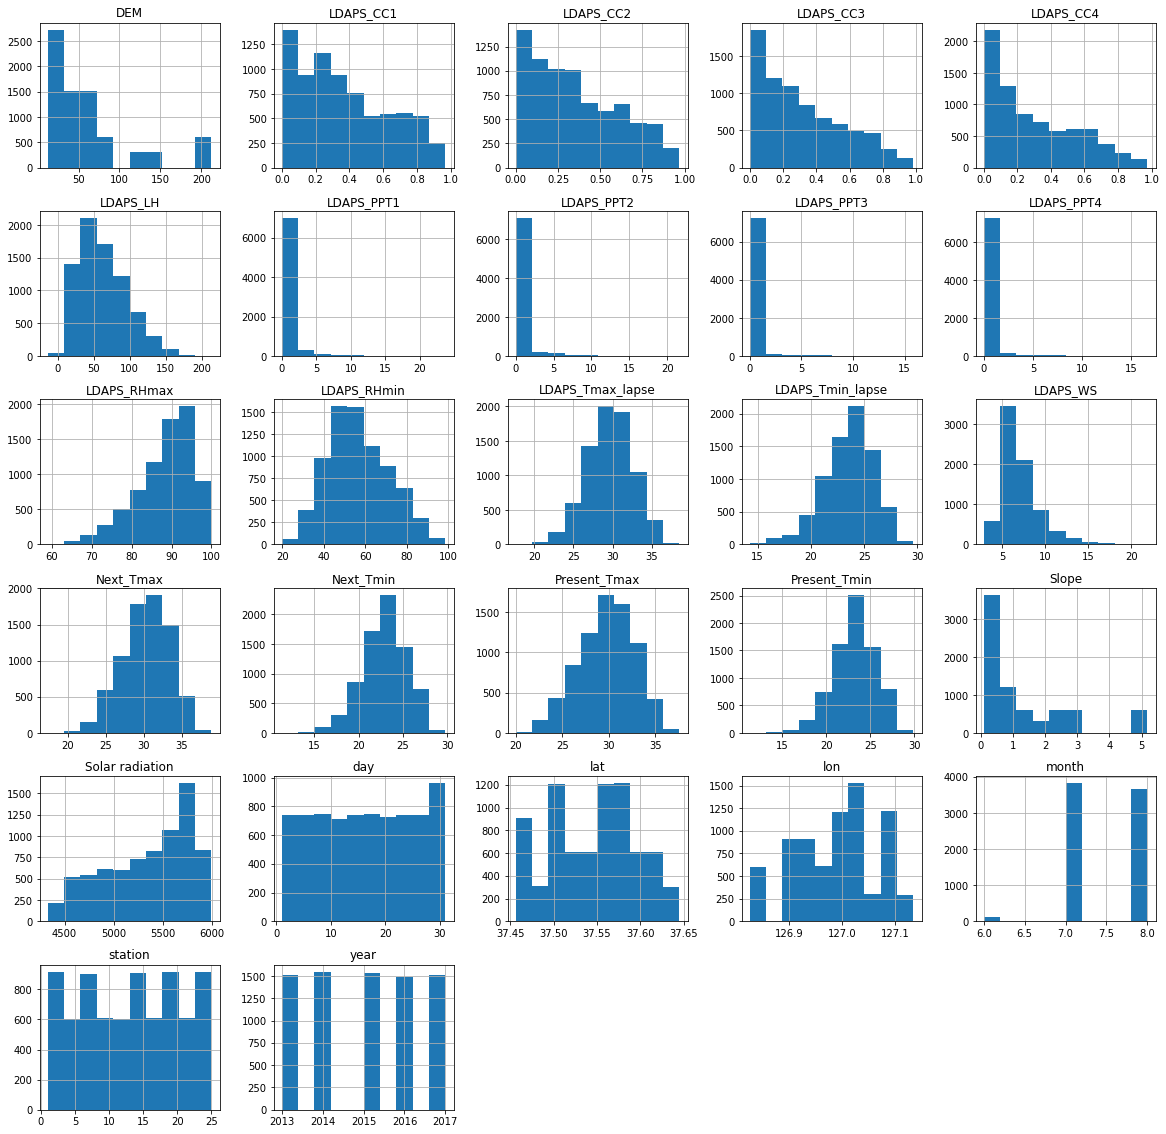

In [13]:
df.hist(figsize=(20,20))
plt.show()

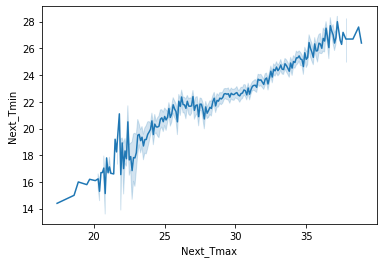

In [14]:
sns.lineplot(x=df['Next_Tmax'],y=df['Next_Tmin'],data=df)
plt.show()

In [15]:
#seprating input and output
#target_name=['Next_Tmax','Next_Tmin']
df_x=df.drop(columns=['Next_Tmax','Next_Tmin'])
y=df[['Next_Tmax','Next_Tmin']]

In [16]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [18]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 43 is 0.824563531558445


In [19]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [20]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 43 is 0.830206722104806


In [21]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.7328121381818071
Standard deviation in r2 score for Linear Regression :  0.07009508942491328


 Mean r2 score for KNN Regression :  0.5928674824723283
Standard deviation in r2 score for KNN Regression :  0.10165002507479085


In [22]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [23]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 43 is 0.822643173154142


In [24]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  0.7411151619241271
standard deviation for lasso ragression :  0.06478348605498026


In [26]:
# we tried all the model and till now ada boost regression is the best
#random state corresponding to highest r2_score is 43
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.30)
knr=KNeighborsRegressor(n_neighbors=29)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [27]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  1.20137169244781
r2_score is :  0.8178911526061583


In [28]:
from sklearn.externals import joblib
joblib.dump(knr,'Next_Tmax_Tmin_model.obj')

['Next_Tmax_Tmin_model.obj']

In [29]:
model=joblib.load('Next_Tmax_Tmin_model.obj')

In [30]:
result=pd.DataFrame(model.predict(x_test))

In [31]:
result.to_csv('Next_Tmax_Tmin_prdictresults.csv')